# Requirements

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
# Add as many imports as you need.

## Obesity Analysis


# Dataset Description

## Attributes

- id: represents a unique identifier for each participant or record in the dataset.
- Gender: Represents the gender of the individual.
- Age: Indicates the age of the individual.
- Height - Represents the height of the individual.
- Weight: Represents the weight of the individual.
- FCVC Frequency of Consumption of Vegetables
- NCP - Number of Main Meals per Day
- SMOKE - Indicates whether the individual smokes
- CH2O - Consumption of Water
- TUE - Time Using Electronic Devices
- MTRANS - Mode of Transportation
- NObeyesdad - Nutritional Obesity Status, obesity class

### Target variable
- FAF Frequency of Physical Activity

# Read the dataset

In [229]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('obesity.csv')
data.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,Male,24.443011,1.699998,81.669950,2.0,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,1,1.0,Female,18.000000,1.560000,57.000000,2.0,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,2,2.0,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.0,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,4,NaN,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II


Explore the dataset using visualizations of your choice.

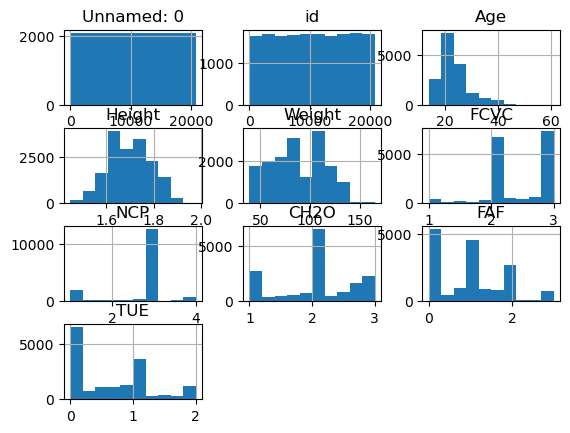

In [231]:
# Write your code here. Add as many boxes as you need.
data.hist()
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [233]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

Unnamed: 0       0
id            4140
Gender        4124
Age           4150
Height        4091
Weight        4281
FCVC          4117
NCP           4061
SMOKE         4110
CH2O          4161
FAF           4139
TUE           4147
MTRANS        4158
NObeyesdad    4133
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

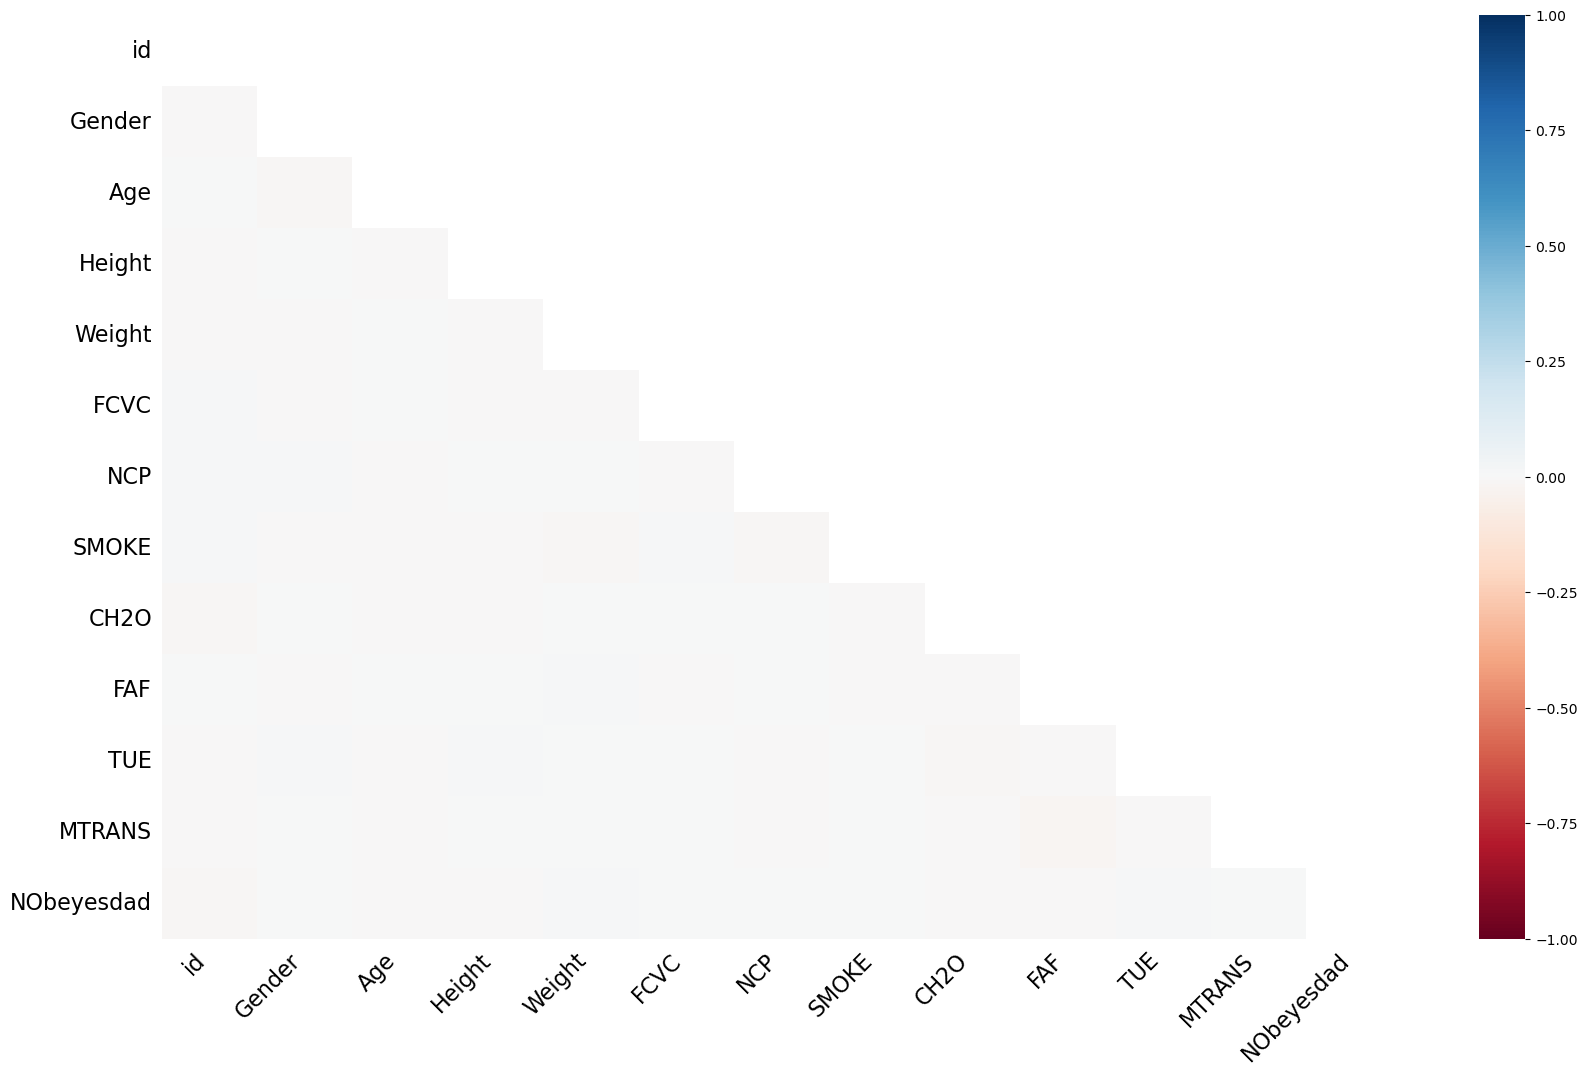

In [235]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

In [237]:
data.head()

,Unnamed: 0,id,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,0,0.0,Male,24.443011,1.699998,81.669950,2.0,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,1,1.0,Female,18.000000,1.560000,57.000000,2.0,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,2,2.0,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,3,3.0,NaN,20.952737,1.710730,131.274851,3.0,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,4,NaN,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II


## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [239]:
# Write your code here. Add as many boxes as you need.
def drop_data(data,columns):
    data_copy = data.copy()
    data_copy.drop(columns,axis=1,inplace=True)
    return data_copy

In [241]:
data = drop_data(data=data,columns=['Unnamed: 0','id'])

In [243]:
data.head()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,2.0,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,Female,18.000000,1.560000,57.000000,2.0,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,NaN,20.952737,1.710730,131.274851,3.0,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

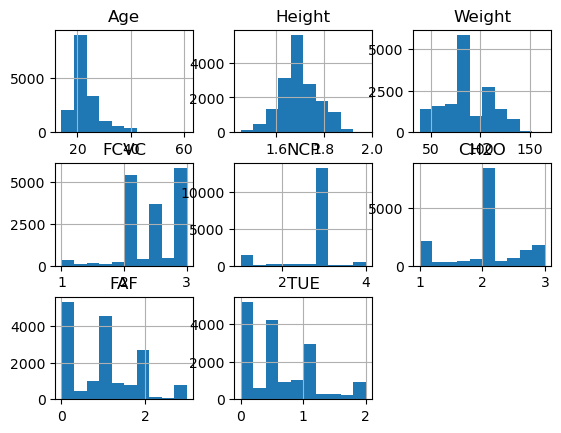

In [259]:
data.hist()

In [247]:
def impute(data,columns,strategy):
    imp = SimpleImputer(strategy=strategy)
    data_copy = data.copy()
    for c in columns:
        data_copy[c] = imp.fit_transform(data_copy[[c]]).ravel()
    return data_copy

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      16634 non-null  object 
 1   Age         16608 non-null  float64
 2   Height      16667 non-null  float64
 3   Weight      16477 non-null  float64
 4   FCVC        16641 non-null  float64
 5   NCP         16697 non-null  float64
 6   SMOKE       16648 non-null  object 
 7   CH2O        16597 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         16611 non-null  float64
 10  MTRANS      16600 non-null  object 
 11  NObeyesdad  16625 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.9+ MB


In [253]:
data.dropna(subset=['FAF'],inplace=True)
data = impute(data=data,columns=['Height'],strategy='mean')
data = impute(data=data,columns=['Age','Weight','FCVC','NCP','CH2O','TUE'],strategy='median')
data = impute(data=data,columns=['Gender','SMOKE','MTRANS','NObeyesdad'],strategy='most_frequent')

In [255]:
data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [261]:
data.sample(5)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
16064,Female,19.000000,1.560000,51.000000,2.000000,3.00000,no,2.000000,0.000000,1.000000,Public_Transportation,Normal_Weight
1918,Female,26.000000,1.627532,110.970479,3.000000,3.00000,no,2.639816,0.000000,0.582840,Public_Transportation,Obesity_Type_III
18168,Female,21.746113,1.749118,131.877558,3.000000,3.00000,no,1.436616,1.429256,0.947091,Public_Transportation,Obesity_Type_III
7254,Male,22.829753,1.700000,90.032671,2.336044,2.64155,no,1.817860,0.966617,0.839659,Public_Transportation,Overweight_Level_II
10817,Male,21.000000,1.780000,84.722222,2.400352,3.00000,no,2.000000,1.000000,0.000000,Public_Transportation,Obesity_Type_I


## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [263]:
# Write your code here. Add as many boxes as you need.
def encode(data,columns):
    enc = LabelEncoder()
    data_copy = data.copy()
    for c in columns:
        data_copy[c] = enc.fit_transform(data_copy[c])
    return data_copy

In [265]:
data = encode(data=data,columns=['Gender','SMOKE','MTRANS','NObeyesdad'])

In [267]:
data.sample(5)

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
4375,0,21.030909,1.746652,133.742943,3.0,3.000000,0,2.868132,1.280924,0.975504,3,4
6147,0,22.000000,1.650000,58.000000,2.0,3.000000,0,2.000000,0.000000,1.000000,3,1
8123,1,31.386405,1.780448,84.722222,2.0,1.171027,0,1.791286,1.000000,0.000000,0,5
2355,1,55.000000,1.680000,80.000000,2.0,3.000000,0,2.000000,1.000000,0.000000,3,4
2158,0,23.426036,1.638075,132.527011,3.0,3.000000,0,2.554007,1.264616,0.802136,3,4


## Hyper-parameter optimization

Train an XGBoost Model, optimize it's hyper-parameters with grid-search and 5-fold cross validation on the training set.

In [269]:
# Write your code here. Add as many boxes as you need.
input = data.copy()
input.drop(columns=['FAF'],axis=1,inplace=True)
input.head()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,TUE,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.976473,3,4
2,0,18.000000,1.700511,50.165754,2.400352,1.411685,0,2.000000,0.582840,3,0
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,0.780199,3,4
4,1,31.641081,1.914186,84.722222,2.400352,1.971472,0,2.000000,0.931721,3,6
5,1,18.128249,1.748524,51.552595,2.919751,3.000000,0,2.137550,0.582840,3,4


In [271]:
target = data.copy()['FAF']
target.head()

0    0.000000
2    0.866045
3    1.467863
4    1.967973
5    1.930033
Name: FAF, dtype: float64

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(input, target, test_size=0.2)

In [275]:
from xgboost import XGBRegressor

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16619 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      16619 non-null  int32  
 1   Age         16619 non-null  float64
 2   Height      16619 non-null  float64
 3   Weight      16619 non-null  float64
 4   FCVC        16619 non-null  float64
 5   NCP         16619 non-null  float64
 6   SMOKE       16619 non-null  int32  
 7   CH2O        16619 non-null  float64
 8   FAF         16619 non-null  float64
 9   TUE         16619 non-null  float64
 10  MTRANS      16619 non-null  int32  
 11  NObeyesdad  16619 non-null  int32  
dtypes: float64(8), int32(4)
memory usage: 1.4 MB


In [279]:
model = XGBRegressor(max_depth=5,n_estimators=20)

In [281]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [283]:
y_pred = model.predict(X_test)
print("R2:", r2_score(Y_test,y_pred))
print("Тренинг точност:", model.score(X_train, Y_train))
print("Тест точност:", model.score(X_test, Y_test))

R2: 0.3191159738302194
Тренинг точност: 0.3922149258043426
Тест точност: 0.3191159738302194


In [285]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
cv = cross_val_score(model,input,target,cv=5,scoring='r2')
print(cv.mean())

0.3151542933406235


In [287]:
params = {
    'max_depth':[5,8,10],
    'n_estimators':[100],
    'learning_rate':[0.1,0.01,0.001]
}

grid = GridSearchCV(estimator=model,param_grid=params,cv=6)
grid.fit(X_train,Y_train)
model2 = grid.best_estimator_
y_pred = model2.predict(X_test)
print(grid.best_params_)
print(r2_score(Y_test,y_pred))
print("Тренинг точност:", model2.score(X_train, Y_train))
print("Тест точност:", model2.score(X_test, Y_test))

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
0.3341949606683954
Тренинг точност: 0.43208442368499245
Тест точност: 0.3341949606683954


# Cross-validation evaluation

Perform leave-one out cross validation on the entire dataset, with an untrained model with the chosen hyper-parameters from the previous step.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.